## Exploratory Analysis for Jewelry_Type = 'Rings'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import json
import re
import seaborn as sns

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")



In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
filename = '/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/effy_clean_split_data.csv'
df = pd.read_csv(filename )

In [4]:
df['Jewelry_Type'].value_counts()

Rings                   1104
Necklace and Pendant     690
Earrings                 413
Bracelets                234
Name: Jewelry_Type, dtype: int64

In [5]:
df[df['Jewelry_Type']=='Rings'].describe()

,Discount_Price,Price,Product_Carat,Stone1_Carat,Stone2_Carat,Stone3_Carat,Stone4_Carat,Stone5_Carat,Stone6_Carat
count,1104.000000,1104.000000,1104.000000,1104.000000,580.000000,28.000000,3.000000,2.0,1.0
mean,2912.287591,4591.213768,1.966014,1.803931,0.395328,0.413571,0.023333,0.0,0.0
std,3415.502234,5131.953538,2.245148,2.233570,0.512195,1.103809,0.040415,0.0,NaN
min,157.500000,225.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1396.500000,2195.000000,0.650000,0.550000,0.130000,0.000000,0.000000,0.0,0.0
50%,2215.000000,3495.000000,1.360000,1.140000,0.270000,0.045000,0.000000,0.0,0.0
75%,3297.500000,5500.000000,2.372500,2.100000,0.470000,0.160000,0.035000,0.0,0.0
max,56350.000000,80500.000000,23.360000,21.160000,4.990000,5.000000,0.070000,0.0,0.0


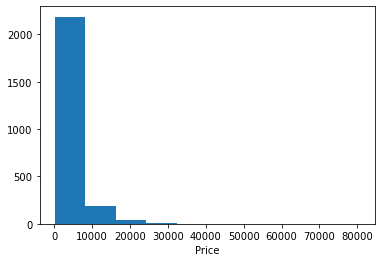

In [6]:
# Making a histogram of the price variable.
_ = plt.hist(df['Price'])
_ = plt.xlabel('Price')
plt.show()

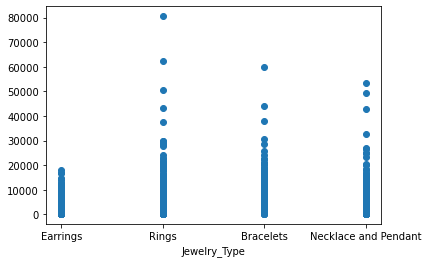

In [7]:
# Making a histogram of the price variable.
_ = plt.scatter(df['Jewelry_Type'], df['Price'])
_ = plt.xlabel('Jewelry_Type')
plt.show()

In [8]:
df_rings = df[df['Jewelry_Type']=='Rings']

In [9]:
df_rings = df_rings.drop(columns=['Stone5_Desc',
       'Stone5_Carat', 'Stone5_Stone', 'Stone5_Color', 'Stone5_Cut',
       'Stone6_Desc', 'Stone6_Carat', 'Stone6_Stone', 'Stone6_Color',
       'Stone6_Cut'])

In [10]:
df_rings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 413 to 1516
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Description     1104 non-null   object 
 1   Discount_Price  1104 non-null   float64
 2   Price           1104 non-null   float64
 3   Metal           1104 non-null   object 
 4   Metal Color     1104 non-null   object 
 5   Stones          1104 non-null   object 
 6   Jewelry_Type    1104 non-null   object 
 7   Product_Carat   1104 non-null   float64
 8   Stone1_Desc     1104 non-null   object 
 9   Stone1_Carat    1104 non-null   float64
 10  Stone1_Stone    1104 non-null   object 
 11  Stone1_Color    1104 non-null   object 
 12  Stone1_Cut      1104 non-null   object 
 13  Stone2_Desc     580 non-null    object 
 14  Stone2_Carat    580 non-null    float64
 15  Stone2_Stone    580 non-null    object 
 16  Stone2_Color    580 non-null    object 
 17  Stone2_Cut      580 non-null   

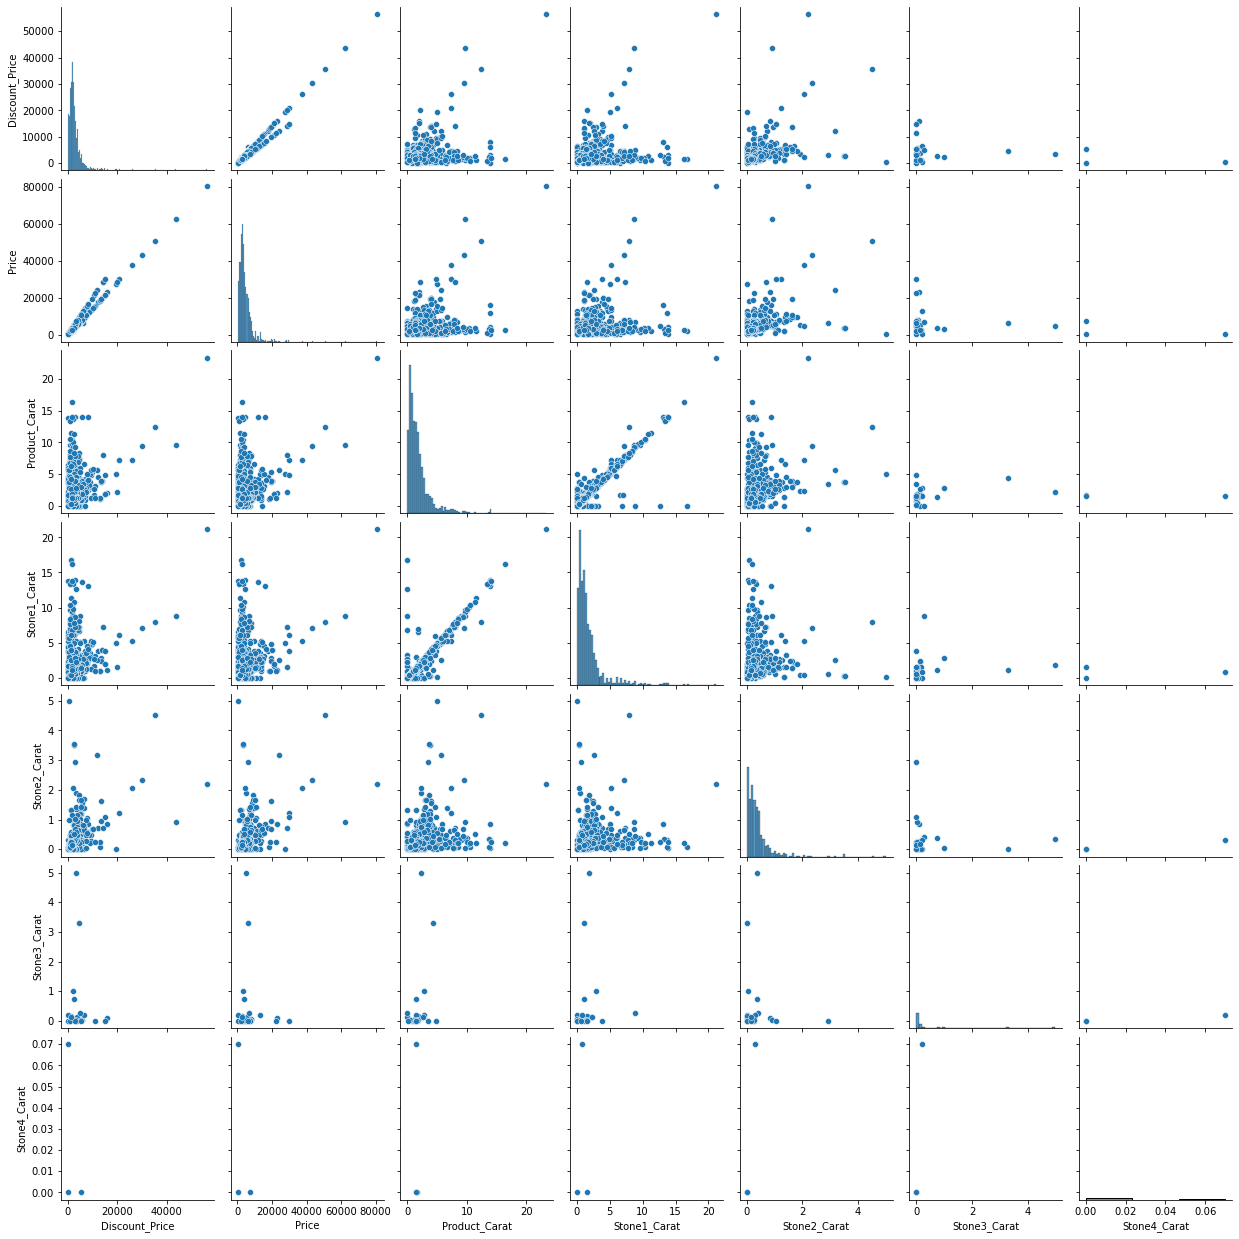

In [11]:
sns.pairplot(df_rings)
plt.show()

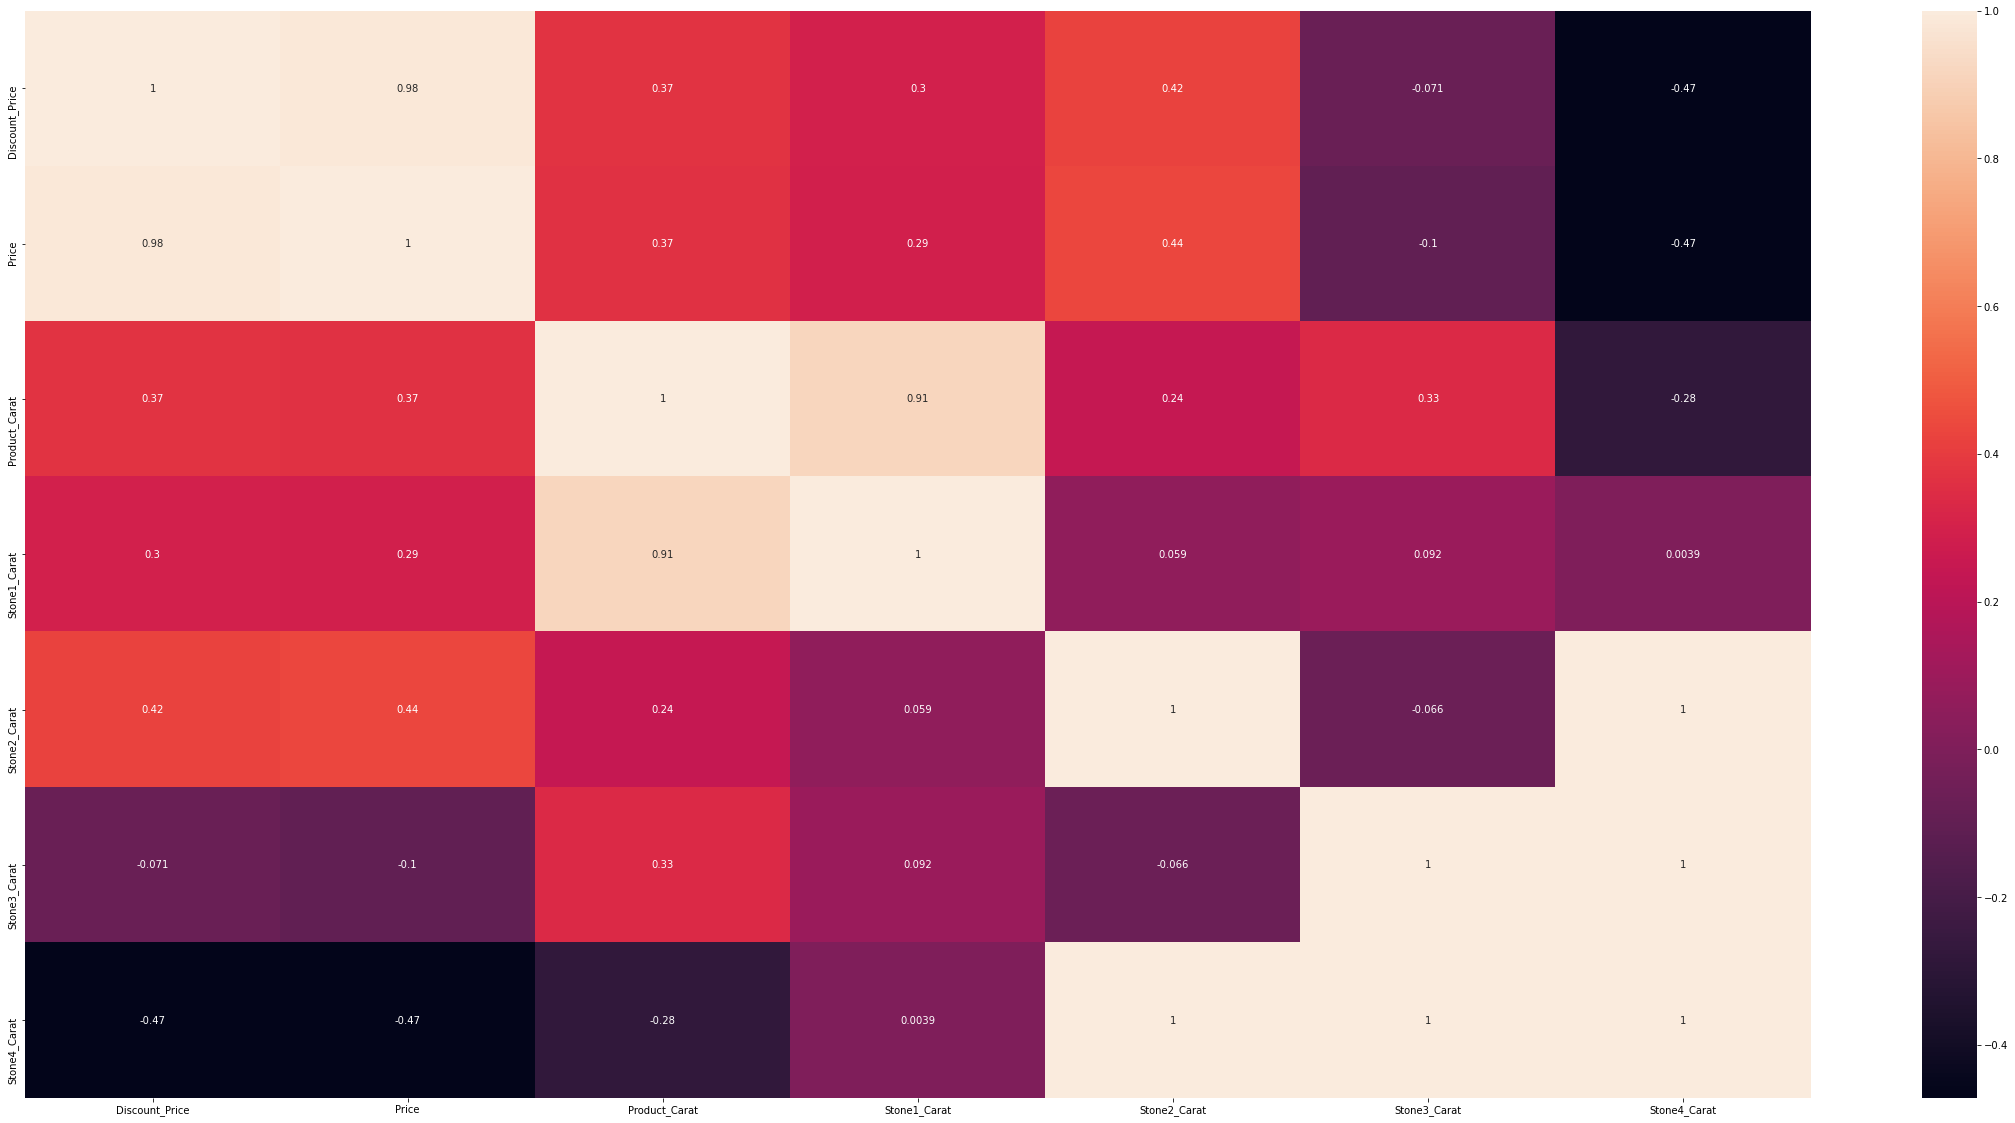

In [12]:
plt.figure(figsize=(40,20))
sns.heatmap(df_rings.corr(), annot=True)
plt.show()

In [13]:
df_rings['Metal'].unique()

array(['14K Gold', '18K Gold', 'Sterling Silver',
       'Sterling Silver & 18K Gold', 'Sterling Silver & 14K Gold',
       'Stainless Steel & 18K Gold', '14k Gold'], dtype=object)

In [14]:
df_rings['Metal'] = df_rings['Metal'].str.replace('14k Gold','14K Gold')

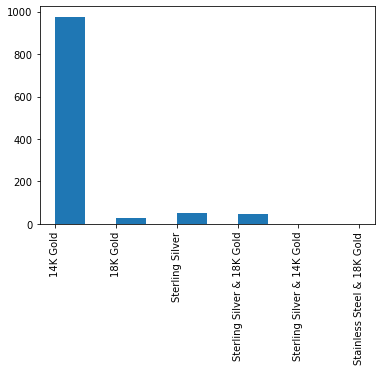

In [15]:
_ = plt.hist(df_rings['Metal'])
plt.xticks(rotation=90)

plt.show()

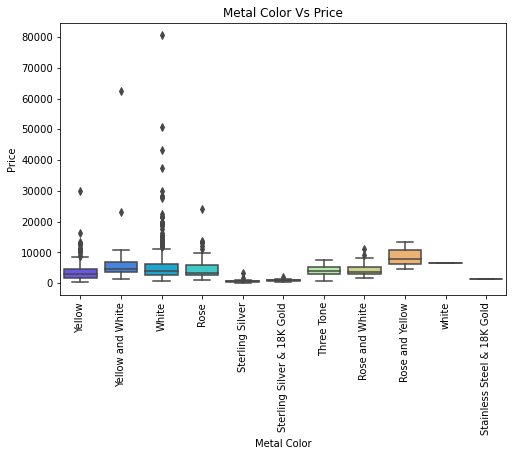

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Metal Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Color Vs Price")
plt.xticks(rotation=90)
plt.show()

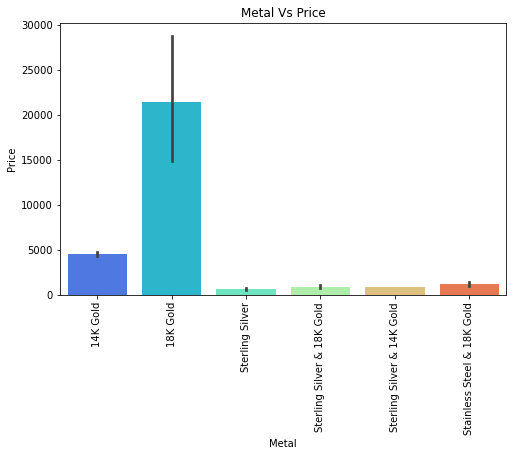

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Metal',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Vs Price")
plt.xticks(rotation=90)
plt.show()

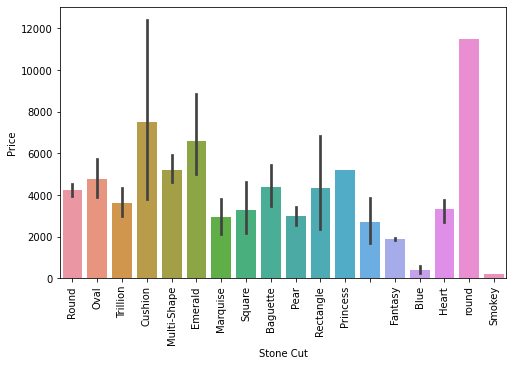

In [18]:
sns.color_palette("flare", as_cmap=True)
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Cut',y='Price',data=df_rings)
plt.xlabel('Stone Cut')
#plt.title("Stone1 Cut Vs Price")
plt.xticks(rotation=90)
plt.show()

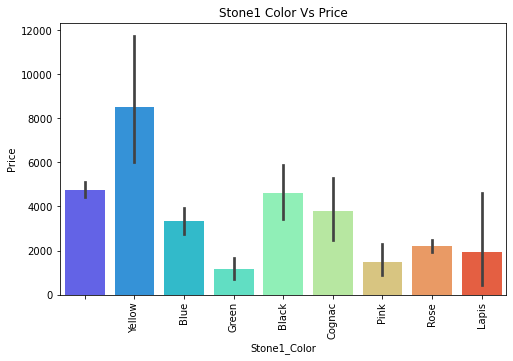

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Stone1 Color Vs Price")
plt.xticks(rotation=90)
plt.show()

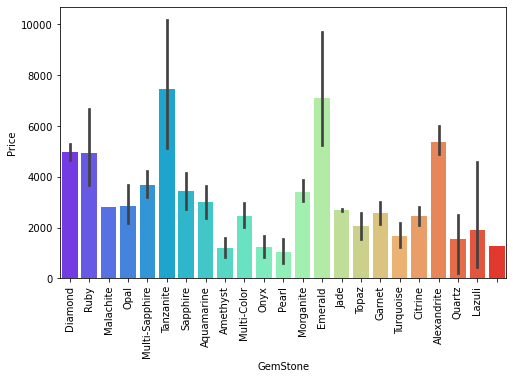

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Stone',y='Price',data=df_rings,palette='rainbow')
#plt.title("Stone1 Vs Price")
plt.xlabel('GemStone')
plt.xticks(rotation=90)
plt.show()

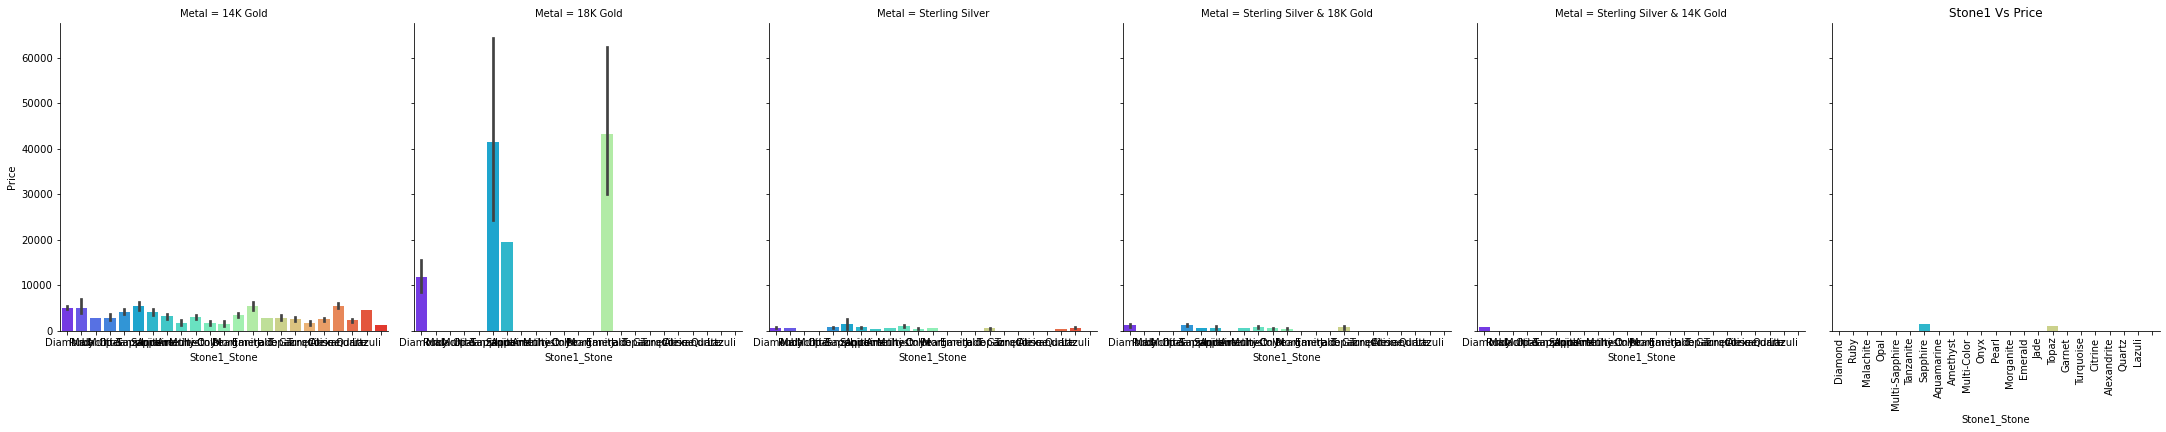

In [21]:
#plt.figure(figsize=(8,5))
sns.catplot(x='Stone1_Stone',y='Price',data=df_rings,col='Metal',palette='rainbow',kind='bar', )
plt.title("Stone1 Vs Price")
plt.xticks(rotation=90)
plt.show()

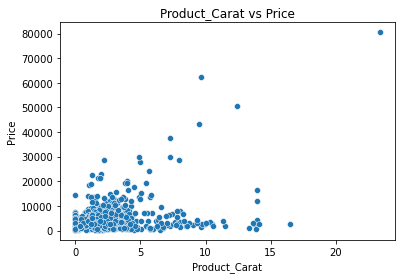

In [22]:
sns.scatterplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

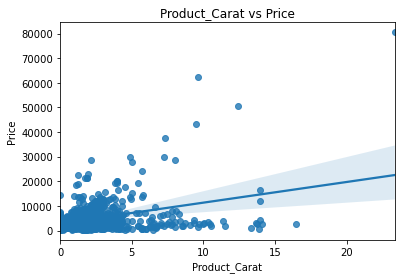

In [23]:
sns.regplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

In [24]:
# Subsetting our data into our dependent and independent variables.
X = df_rings[["Product_Carat"]]
y = df_rings[["Price"]]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [25]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(828, 1) (828, 1)
(276, 1) (276, 1)


## Making a Linear Regression model: our first model


In [26]:
#Create the Model
rModel = linear_model.LinearRegression(normalize=True)

In [27]:
#TRain The Model on test data
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [28]:
#Evaluate the model
print(rModel.score(X_train, y_train))

0.1637280560186033


The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 16% of the variation from the mean. 

In [29]:
#Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

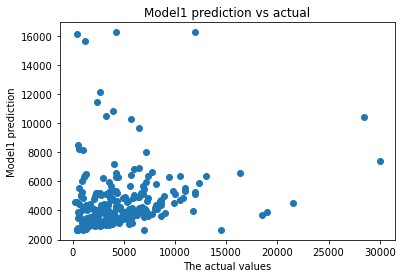

In [30]:
#Plot Predictions against the actual result.
plt.scatter(y_test, y_pred)
plt.title("Model1 prediction vs actual")
plt.xlabel("The actual values")
plt.ylabel("Model1 prediction")

plt.show()

## Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [31]:
X = df_rings[['Product_Carat']]
X = sm.add_constant(X)

y= df_rings[['Price']]

In [32]:
#Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)

In [33]:
#Create the model
rModel2 = sm.OLS(y_train, X_train)

#Fit the model with fit()
rModel2_results = rModel2.fit()

In [34]:
#Evaluate the model with .summary()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     161.7
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           5.80e-34
Time:                        11:16:23   Log-Likelihood:                -8228.1
No. Observations:                 828   AIC:                         1.646e+04
Df Residuals:                     826   BIC:                         1.647e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2660.3365    232.150     11.460      0.000    2204.663    3116.009
Product_Carat   973.8121     76.577     12.717      0.000     823.504    1124.120
==============================================================================
Omnibus:                      796.976   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49173.979
Skew:                           4.229   Prob(JB):                         0.00
Kurtosis:                      39.794   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Use new model to make predictions 
y_pred = rModel2_results.predict(X_test)

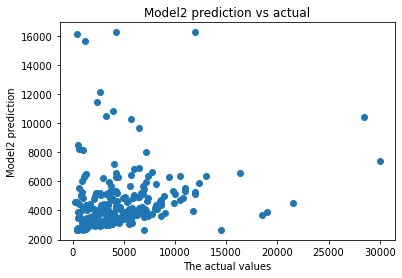

In [36]:
_ = plt.scatter(y_test, y_pred)
plt.title("Model2 prediction vs actual")
plt.xlabel("The actual values")
plt.ylabel("Model2 prediction")

plt.show()

## Conclusion:

Both the models predict 16% variation


## Pre-processing & Training Data Development

In [37]:
df_rings.columns

Index(['Description', 'Discount_Price', 'Price', 'Metal', 'Metal Color',
       'Stones', 'Jewelry_Type', 'Product_Carat', 'Stone1_Desc',
       'Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut',
       'Stone2_Desc', 'Stone2_Carat', 'Stone2_Stone', 'Stone2_Color',
       'Stone2_Cut', 'Stone3_Desc', 'Stone3_Carat', 'Stone3_Stone',
       'Stone3_Color', 'Stone3_Cut', 'Stone4_Desc', 'Stone4_Carat',
       'Stone4_Stone', 'Stone4_Color', 'Stone4_Cut'],
      dtype='object')

In [38]:
df_rings.isnull().sum()

Description          0
Discount_Price       0
Price                0
Metal                0
Metal Color          0
Stones               0
Jewelry_Type         0
Product_Carat        0
Stone1_Desc          0
Stone1_Carat         0
Stone1_Stone         0
Stone1_Color         0
Stone1_Cut           0
Stone2_Desc        524
Stone2_Carat       524
Stone2_Stone       524
Stone2_Color       524
Stone2_Cut         524
Stone3_Desc       1076
Stone3_Carat      1076
Stone3_Stone      1076
Stone3_Color      1076
Stone3_Cut        1076
Stone4_Desc       1101
Stone4_Carat      1101
Stone4_Stone      1101
Stone4_Color      1101
Stone4_Cut        1101
dtype: int64

In [39]:
#'Discount_Price', 'Price', 'Metal', 'Metal Color','Product_Carat','Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut',
df_rings_stone1 = df_rings[['Price', 'Metal', 'Metal Color','Product_Carat','Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut']]

In [40]:
df_rings_stone1.isnull().sum()

Price            0
Metal            0
Metal Color      0
Product_Carat    0
Stone1_Carat     0
Stone1_Stone     0
Stone1_Color     0
Stone1_Cut       0
dtype: int64

In [41]:
df_rings_stone1.shape

(1104, 8)

In [42]:
#Create dummy or indicator features for categorical variables
df_dummy_rings1 = pd.get_dummies(df_rings_stone1)
df_dummy_rings1.shape

(1104, 70)

In [43]:
df_dummy_rings = pd.get_dummies(df_rings)
df_dummy_rings.shape

(1104, 2357)

In [44]:
df_dummy_rings

,Discount_Price,Price,Product_Carat,Stone1_Carat,Stone2_Carat,Stone3_Carat,Stone4_Carat,"Description_14K Rose Gold Diamond and Rose Quartz Ring, 16.45 TCW","Description_14K Rose Gold Pink Sapphire and Diamond Ribbon Ring, 0.38 TCW","Description_14K Two Tone Gold Blue and White Diamond Crossover Ring, 1.00 TCW",...,Stone3_Cut_Top,Stone4_Desc_ Citrine,Stone4_Desc_ Green,Stone4_Desc_ Round Garnet,Stone4_Stone_Citrine,Stone4_Stone_Garnet,Stone4_Stone_Green,Stone4_Color_,Stone4_Cut_,Stone4_Cut_Round
413,5736.5,8195.0,1.50,1.35,0.12,0.03,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,5036.5,7195.0,0.96,0.96,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,1190.0,1700.0,0.35,0.35,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416,7696.5,10995.0,2.49,1.90,0.59,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
417,6650.0,9500.0,3.59,1.90,1.69,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,5250.0,10500.0,3.06,1.42,1.64,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,3597.5,7195.0,2.76,2.19,0.57,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,2726.5,3895.0,8.37,7.85,0.52,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515,1375.0,2750.0,4.19,3.95,0.24,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#Split your data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(df_dummy_rings1.drop(columns='Price'), 
                                                    df_dummy_rings1.Price, test_size=0.3, 
                                                    random_state=47)

In [46]:
X_train.shape, X_test.shape

((772, 69), (332, 69))

In [47]:
train_mean = y_train.mean()
train_mean

4656.865284974093

## Define the pipeline

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler


pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()

)
# LogisticRegression(C=10, tol=0.01, solver='lbfgs', max_iter=10000)

## Fit the pipeline

In [49]:
pipe.fit(X_train, y_train)

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7f93d1249040>)),
                ('linearregression', LinearRegression())])

In [50]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [51]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.5561442345739225, 0.06204261301881708)

In [52]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(2235.8107767379283, 2495.372289121468)

In [53]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(13317717.438324358, 16597981.071382672)

## Assessing performance using cross-validation

In [54]:
cv_results = cross_validate(pipe, X_train, y_train,cv=5)

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [55]:
cv_results

{'fit_time': array([0.45056581, 0.09467816, 0.15606809, 0.19117618, 0.37658691]),
 'score_time': array([0.00645494, 0.01145196, 0.01256275, 0.01052189, 0.00955606]),
 'test_score': array([ 0.24262126, -0.55512358,  0.48868967,  0.48835338,  0.65273461])}

In [56]:
cv_scores = cv_results['test_score']
cv_scores

array([ 0.24262126, -0.55512358,  0.48868967,  0.48835338,  0.65273461])

In [57]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [58]:
pipe1 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LogisticRegression(C=10, tol=0.01, solver='lbfgs', max_iter=10000))

In [59]:
pipe1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'logisticregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [60]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [61]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train, y_train)
#logr_grid_cv = GridSearchCV(pipe1, param_grid=grid_params, cv=5, n_jobs=-1)

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=15,
                                                    score_func=<function f_regression at 0x7f93d1249040>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [62]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]
lr_grid_cv.best_params_

{'selectkbest__k': 31}

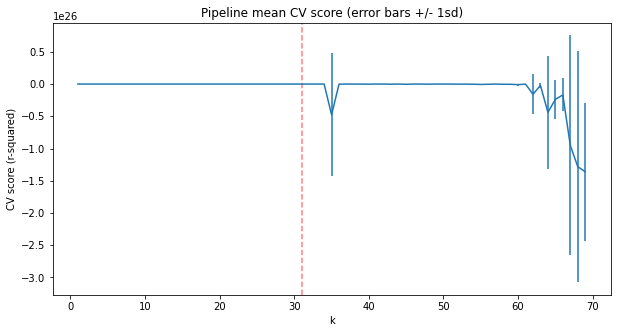

In [63]:
#Code task 20#
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [64]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [65]:
lr_grid_cv.best_estimator_.named_steps.linearregression.coef_

array([ 2611.57579163,  -249.94918185,   491.08435958,  3191.91092149,
       -1455.85775458,    21.95612818,  -342.23512169,  1142.8669605 ,
        -178.70829127,   440.62645917,  -247.54527097,   152.50040603,
        -371.99116632,  -396.01022201,   499.33779083,  -487.1511616 ,
        -285.8664312 ,  -393.98962855,   -53.04002102,  -204.59122644,
         209.274851  ,  -706.12750144,   345.45825595,     4.54373946,
         -45.52391553,     5.07158585,  -589.98057023,   118.89508704,
          -9.55979382,  -424.95467695,   461.64954308])

In [66]:
#Code task 21#
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Metal_18K Gold                            3191.910921
Product_Carat                             2611.575792
Metal Color_Sterling Silver               1142.866961
Stone1_Stone_Emerald                       499.337791
Metal_14K Gold                             491.084360
Stone1_Cut_Round                           461.649543
Metal Color_White                          440.626459
Stone1_Color_                              345.458256
Stone1_Stone_Tanzanite                     209.274851
Metal Color_Yellow and White               152.500406
Stone1_Cut_Cushion                         118.895087
Metal_Sterling Silver & 18K Gold            21.956128
Stone1_Color_Pink                            5.071586
Stone1_Color_Blue                            4.543739
Stone1_Cut_Emerald                          -9.559794
Stone1_Color_Green                         -45.523916
Stone1_Stone_Pearl                         -53.040021
Metal Color_Sterling Silver & 18K Gold    -178.708291
Stone1_Stone_Sapphire       

## Checking with Logistic Regression

In [72]:
logr_grid_cv = GridSearchCV(pipe1, param_grid=grid_params, cv=5, n_jobs=-1)
logr_grid_cv.fit(X_train, y_train)

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=15,
                                                    score_func=<function f_regression at 0x7f93d1249040>)),
                                       ('logisticregression',
                                        LogisticRegression(C=10, max_iter=10000,
                                                           tol=0.01))]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [73]:
score_mean = logr_grid_cv.cv_results_['mean_test_score']
score_std = logr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in logr_grid_cv.cv_results_['param_selectkbest__k']]


In [83]:
#Code task 19#
#Print the `best_params_` attribute of `logr_grid_cv`
logr_grid_cv.best_params_

{'selectkbest__k': 1}

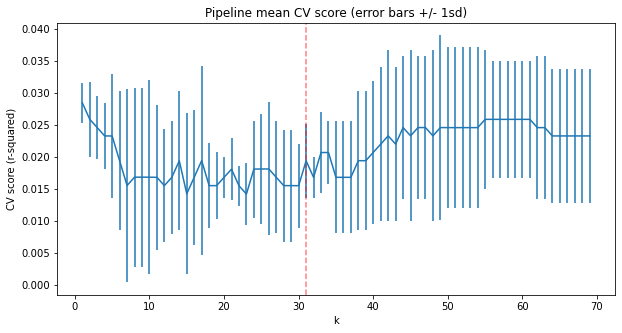

In [89]:
#Code task 20#
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [90]:
selected = logr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [91]:
logr_grid_cv.best_estimator_.named_steps.logisticregression.coef_

array([[-0.06485576],
       [-0.06485576],
       [-0.06485576],
       [-0.09637126],
       [-0.06485576],
       [-0.09637126],
       [-0.06485576],
       [-0.11875334],
       [-0.06485576],
       [-0.18879709],
       [-0.09637126],
       [-0.11875334],
       [-0.13716733],
       [-0.06485576],
       [-0.1659494 ],
       [-0.1659494 ],
       [-0.06485576],
       [-0.15250802],
       [-0.06485576],
       [-0.11875334],
       [-0.09637126],
       [-0.18879709],
       [-0.17791765],
       [-0.18879709],
       [-0.06485576],
       [-0.09637126],
       [-0.11875334],
       [-0.09637126],
       [-0.09637126],
       [-0.17791765],
       [-0.06485576],
       [-0.11875334],
       [-0.09637126],
       [-0.1659494 ],
       [-0.15250802],
       [-0.06485576],
       [-0.15250802],
       [-0.11875334],
       [-0.1659494 ],
       [-0.11875334],
       [-0.06485576],
       [-0.17791765],
       [-0.06485576],
       [-0.15250802],
       [-0.17791765],
       [-0

In [93]:
#Code task 21#
#Get the Logistic model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = logr_grid_cv.best_estimator_.named_steps.logisticregression.coef_



In [94]:
features = X_train.columns[selected]


In [95]:
features

Index(['Metal_18K Gold'], dtype='object')

In [96]:

pd.Series(coefs, index=features).sort_values(ascending=False)

ValueError: Length of passed values is 240, index implies 1.

## Random Forest Model

In [99]:

#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
from sklearn.ensemble import RandomForestRegressor
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

## Fit and assess performance using cross-validation

In [100]:

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [101]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.7367056 , 0.49198664, 0.73120688, 0.76721141, 0.838399  ])

In [102]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.7131019053202852, 0.11696502525819083)

In [103]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [104]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [105]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [106]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 26,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [108]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.74340268, 0.5915063 , 0.70688099, 0.76791659, 0.79192734])

In [109]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.7203267799469029, 0.07028432865156337)

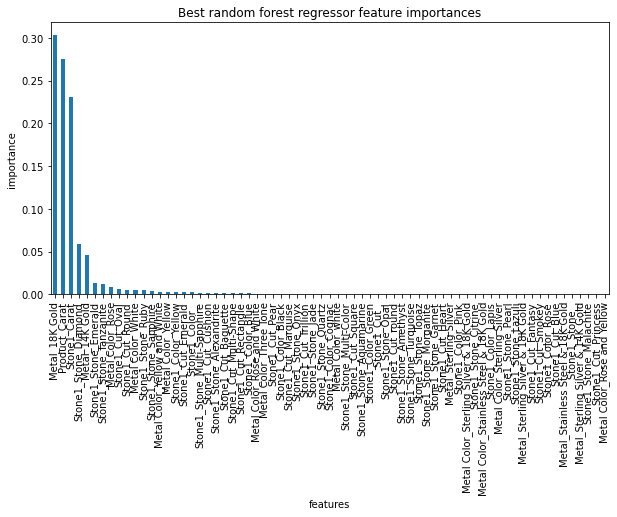

In [110]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');